## Normalization and Standardization

#### Types Of Transformation
Normalization And Standardization , Scaling to Minimum And Maximum values ,  Scaling To Median And Quantiles and  Guassian Transformation : Logarithmic Transformation, Reciprocal Trnasformation, Square Root Transformation ,  Exponential Trnasformation , Box Cox Transformation

## Standardization

We try to bring all the variables or features to a similar scale.
standarisation means centering the variable at zero. 

z=(x-x_mean)/std

In [2]:
import pandas as pd

In [3]:
df =pd.read_csv('titanic_train.csv',usecols=["Pclass","Age","Fare","Survived"])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [7]:
median=df.Age.median()

In [8]:
df['Age'].fillna(median,inplace=True)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scale = StandardScaler()   ## Creation of object

### fit vs fit_transform :

fit() just calculates the parameters (e.g. μ and σ in case of StandardScaler) and saves them as an internal object's state. Afterwards, you can call its transform() method to apply the transformation to any particular set of examples.

fit_transform() joins these two steps and is used for the initial fitting of parameters on the training set x, while also returning the transformed x′. Internally, the transformer object just calls first fit() and then transform() on the same data.
    

In [11]:
## Here we are doing tranformation , therefore we will use fit_transform()

In [13]:
arr=scale.fit_transform(df)
arr

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [16]:
df_transformed=pd.DataFrame(arr,columns=df.columns)

In [17]:
df_transformed.head()

,Survived,Pclass,Age,Fare
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337


In [18]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


<IPython.core.display.Javascript object>

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <a list of 20 Patch objects>)

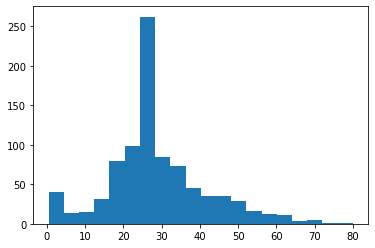

In [23]:
plt.hist(df["Age"],bins=20)

<IPython.core.display.Javascript object>

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <a list of 20 Patch objects>)

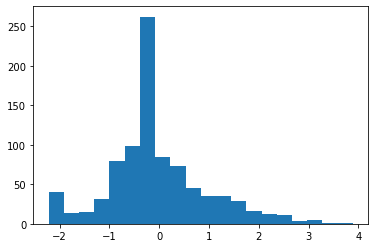

In [25]:
plt.hist(df_transformed["Age"],bins=20)

<IPython.core.display.Javascript object>

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <a list of 20 Patch objects>)

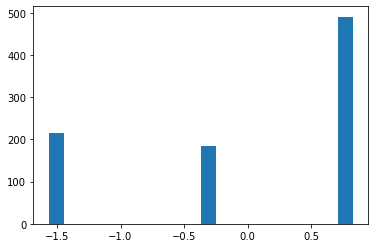

In [32]:
plt.hist(df_transformed["Pclass"],bins=20)

<IPython.core.display.Javascript object>

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
        2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <a list of 20 Patch objects>)

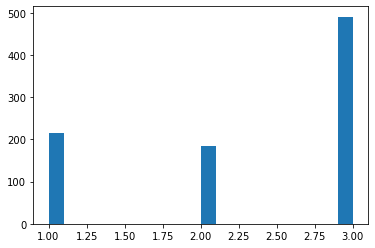

In [34]:
plt.hist(df["Pclass"],bins=20)

As you can see, the density and distribution is not changed at all, just the features are standardized by using z-score formula 

In [28]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [30]:
print(df.Pclass.mean()) 
print(df.Pclass.std())

2.308641975308642
0.8360712409770513


<IPython.core.display.Javascript object>

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <a list of 20 Patch objects>)

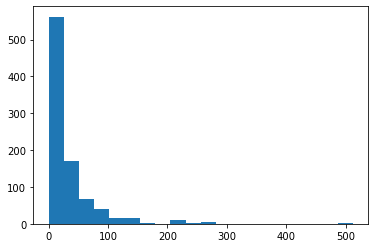

In [36]:
plt.hist(df["Fare"],bins=20)

<IPython.core.display.Javascript object>

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <a list of 20 Patch objects>)

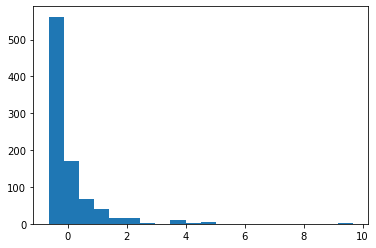

In [37]:
plt.hist(df_transformed["Fare"],bins=20)

In [38]:
## Since there are lot of outliers in Fare, the values are ranging from -0.5 to 10
## If there are outliers there will definitely have some impact on transformation

## Min Max Scaling (### CNN)---Deep Learning Techniques

Min Max Scaling scales the values between 0 to 1.
X_scaled = (X - X.min / (X.max - X.min)

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
trans = scaler.fit_transform(df)
trans

array([[0.        , 1.        , 0.27117366, 0.01415106],
       [1.        , 0.        , 0.4722292 , 0.13913574],
       [1.        , 1.        , 0.32143755, 0.01546857],
       ...,
       [0.        , 1.        , 0.34656949, 0.04577135],
       [1.        , 0.        , 0.32143755, 0.0585561 ],
       [0.        , 1.        , 0.39683338, 0.01512699]])

In [42]:
pd.DataFrame(trans)

,0,1,2,3
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713
...,...,...,...,...
886,0.0,0.5,0.334004,0.025374
887,1.0,0.0,0.233476,0.058556
888,0.0,1.0,0.346569,0.045771
889,1.0,0.0,0.321438,0.058556


<IPython.core.display.Javascript object>

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <a list of 20 Patch objects>)

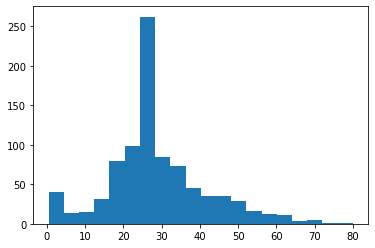

In [43]:
plt.hist(df['Age'],bins=20)

<IPython.core.display.Javascript object>

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

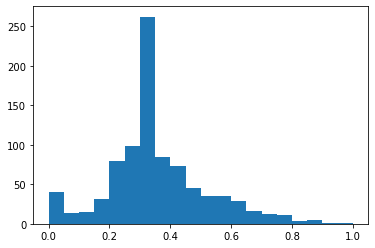

In [45]:
plt.hist(trans[:,2],bins=20)

<IPython.core.display.Javascript object>

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <a list of 20 Patch objects>)

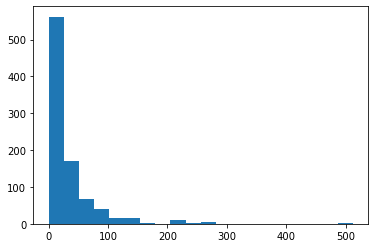

In [46]:
plt.hist(df['Fare'],bins=20)

<IPython.core.display.Javascript object>

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

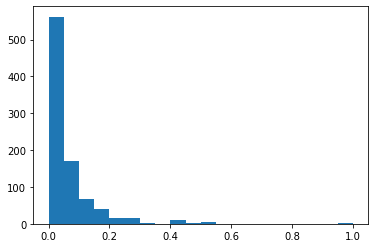

In [47]:
plt.hist(trans[:,3],bins=20)

In [48]:
## Here 1.0 is considered as outlier as all the values are in the range 0.0-0.2.

In [49]:
## But again, the density and distribution pattern is not changed at all

## Robust Scaler

It is used to scale the features to median and quantiles.

Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 , 
1-10 precentile---10% of all values in this group is less than 1, 4-40%

### ** It is robust to outliers

In [11]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust= pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


Standardization of a dataset is a common requirement for many
machine learning estimators. Typically this is done by removing the mean
and scaling to unit variance. However, outliers can often influence the
sample mean / variance in a negative way. In such cases, the median and
the interquartile range often give better results.

<IPython.core.display.Javascript object>

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <a list of 20 Patch objects>)

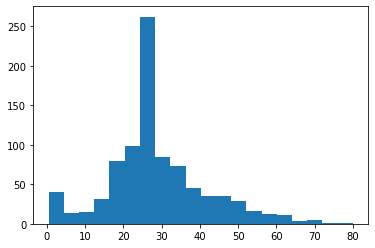

In [12]:
plt.hist(df['Age'],bins=20)

<IPython.core.display.Javascript object>

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <a list of 20 Patch objects>)

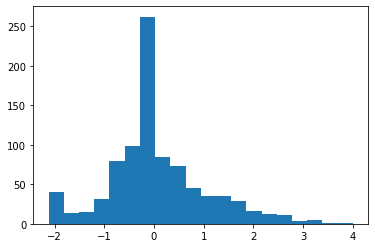

In [13]:
plt.hist(df_robust['Age'],bins=20)

<IPython.core.display.Javascript object>

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <a list of 20 Patch objects>)

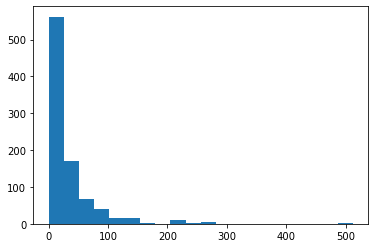

In [14]:
plt.hist(df['Fare'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <a list of 20 Patch objects>)

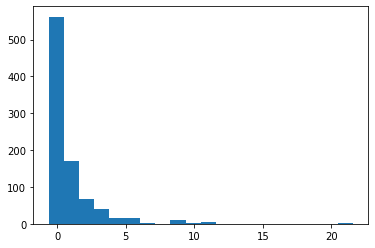

In [148]:
plt.hist(df_robust['Fare'],bins=20)   ##It is robust to outliers

## Gaussian Tranformation

Some machine learning algorithms like linear and logistic assume that the features are normally distributed 

Accuracy and Performance goes high when data is normally or gaussian distributed

1. logarithmic transformation
2. reciprocal transformation
3. square root transformation
4. exponential transformation (more general, you can use any exponent)
5. boxcox transformation

In [65]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived']) 


In [66]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


#### First we need to check whether all the features are normally or gaussian distributed and if they are not, then we will use the above method for transformation


#### We use " Q-Q plot " to check whether the feature is normal or gaussian distributed

In [49]:
## but first we need to handle missing values

In [68]:
df["Age"]=df['Age'].fillna(df.Age.median())

In [69]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
## libraries need to Q-Q plot
import scipy.stats as stat
import pylab

In [72]:
## Generalized function to plot graphs

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

In [73]:
## stat.probplot(df[variable],dist='norm',plot=pylab) here, the X-axis will be df[variable] and y-axis will be the normally distributed points that will be intialized by this function

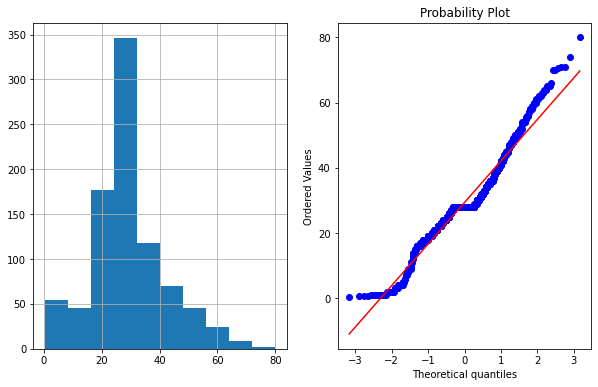

In [75]:
plot_data(df,"Age")

In [76]:
## Here x-axis is theoretical quantiles of normal distribution and y axis is our data. The staight line is best fit line.
## That is , if our data points fall in straight line then the feature is normally distributed.

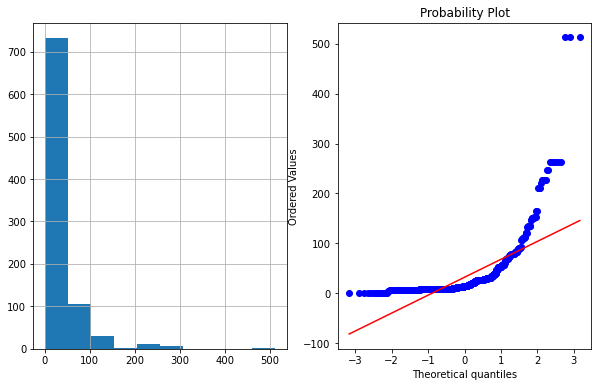

In [61]:
plot_data(df,"Fare")

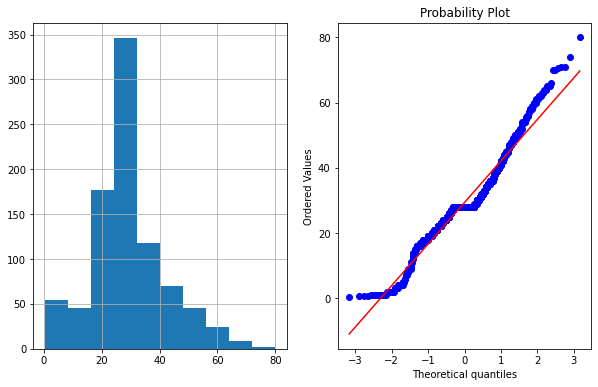

In [77]:
plot_data(df,"Age")

In [78]:
# Now, most of all the points are falling in straight line but we will still apply some transformation techniques to check some results

### Logarithmic Transformation

In [81]:
import numpy as np
df['Age_log']=np.log(df['Age'])
df['Age_log']

0      3.091042
1      3.637586
2      3.258097
3      3.555348
4      3.555348
         ...   
886    3.295837
887    2.944439
888    3.332205
889    3.258097
890    3.465736
Name: Age_log, Length: 891, dtype: float64

In [82]:
## If we plot these values and we get a bell curve or N.D then the feature "Age" belongs to log normal distribution. 

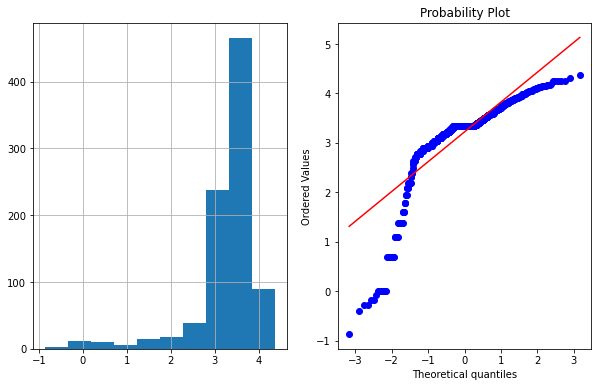

In [93]:
plot_data(df,"Age_log")

In [ ]:
## It became left skewed.

In [84]:
## Now as we can see, the data points are no way near the straight line and thus it does not follow N.D and thus, the age feature is not log normally dsitributed and log normal transformation won't work on this feature
## Log normal tranformation mostly works on features which are log normally distributed or you an say right or left skewed

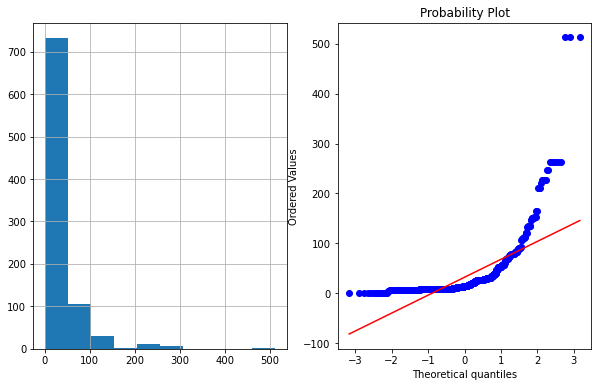

In [85]:
plot_data(df,'Fare')

In [86]:
## Now we can see, the data points are not following straight line and from histogram we can see, the data is right skewed.


In [87]:
df['Fare_log']=np.log(df['Fare'])
df['Fare_log']

C:\Users\Jayesh\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
         ...   
886    2.564949
887    3.401197
888    3.154870
889    3.401197
890    2.047693
Name: Fare_log, Length: 891, dtype: float64

ValueError: supplied range of [-inf, 6.238967387173662] is not finite

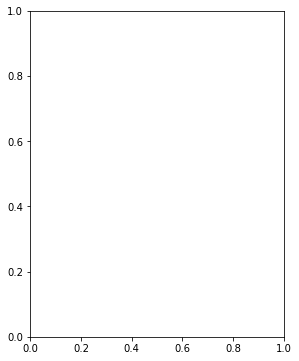

In [89]:
plot_data(df,'Fare_log')

In [90]:
## ERROR : supplied range of [-inf, 6.238967387173662] is not finite.
## It seems like we have nans or inf in our data.

In [91]:
df['Fare_log'].max()

6.238967387173662

In [92]:
## As log tranformation does not convert Age into N.D. We will check another transformations

## Reciprocal Transformation

In [95]:
df['Age_reciprocal']=1/df["Age"]
df['Age_reciprocal']


0      0.045455
1      0.026316
2      0.038462
3      0.028571
4      0.028571
         ...   
886    0.037037
887    0.052632
888    0.035714
889    0.038462
890    0.031250
Name: Age_reciprocal, Length: 891, dtype: float64

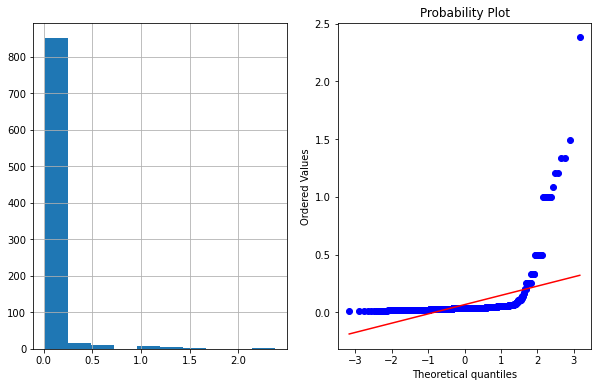

In [96]:
plot_data(df,"Age_reciprocal")

In [97]:
## Here , it became right skewed.

In [98]:
# This transformation is again unable to convert age into full proper N.D as it does not follow straight line.

##### Next technique:
### Square Root Transformation

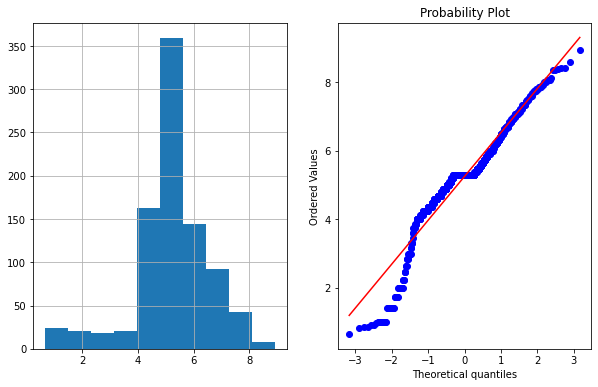

In [99]:
df["Age_square"]=df.Age**(1/2)
plot_data(df,'Age_square')

In [100]:
## The data points do fall somewhere in straight line.
## You can say this transformation work well with Age feature

## Exponential Transformation

In [101]:
df['Age_exp']=np.exp(df["Age"])

In [103]:
df['Age_exp']


0      3.584913e+09
1      3.185593e+16
2      1.957296e+11
3      1.586013e+15
4      1.586013e+15
           ...     
886    5.320482e+11
887    1.784823e+08
888    1.446257e+12
889    1.957296e+11
890    7.896296e+13
Name: Age_exp, Length: 891, dtype: float64

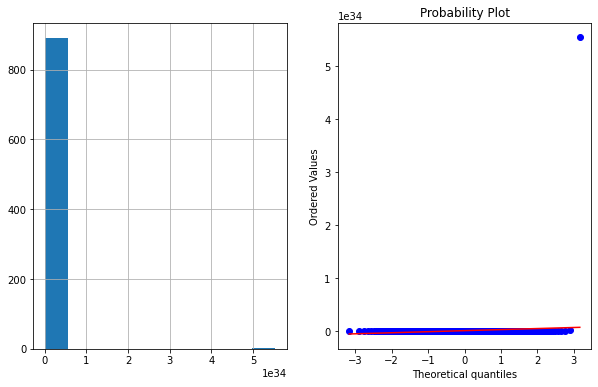

In [104]:
plot_data(df,"Age_exp")

In [106]:
df['Age_exp2']=2.718281**df["Age"]

In [108]:
df['Age_exp']

0      3.584913e+09
1      3.185593e+16
2      1.957296e+11
3      1.586013e+15
4      1.586013e+15
           ...     
886    5.320482e+11
887    1.784823e+08
888    1.446257e+12
889    1.957296e+11
890    7.896296e+13
Name: Age_exp, Length: 891, dtype: float64

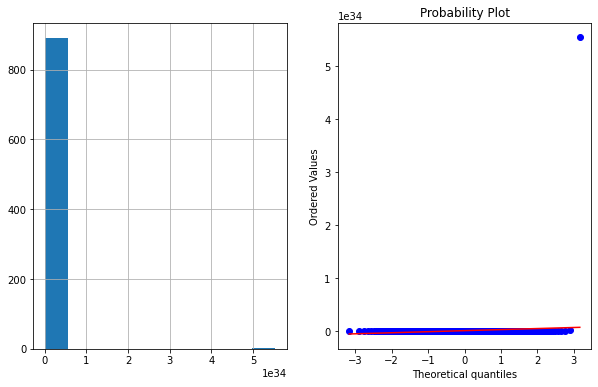

In [109]:
plot_data(df,"Age_exp")


In [110]:
## Now as we can see , all the data points are following a straight line.It is even better than the initial distribution
## This transformation worked really well with Age feature and converts them into proper N.D. 

#### Last technique:
## BoxCox Transformation

The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [111]:
stat.boxcox(df["Age"])

(array([13.468119  , 21.4987284 , 15.56341683, 20.05611014, 20.05611014,
        16.58601436, 28.84746463,  0.92513402, 16.07664335,  9.01695462,
         2.53193075, 30.6104327 , 12.39181078, 21.97437834,  9.01695462,
        29.29062758,  0.92513402, 16.58601436, 18.09258499, 16.58601436,
        20.05611014, 19.56971919,  9.59722218, 16.58601436,  5.32265694,
        21.4987284 , 16.58601436, 11.84551333, 16.58601436, 16.58601436,
        22.44755196, 16.58601436, 16.58601436, 34.06447944, 16.58601436,
        23.38676361, 16.58601436, 12.93257404, 11.29332892,  9.01695462,
        22.44755196, 16.07664335, 16.58601436,  1.75636071, 11.84551333,
        16.58601436, 16.58601436, 16.58601436, 16.58601436, 11.29332892,
         4.65897047, 12.93257404, 26.60575762, 17.09169505, 33.6375945 ,
        16.58601436, 12.93257404, 16.83930618,  3.26857952,  7.221786  ,
        13.468119  , 21.4987284 , 24.77874367,  2.53193075, 16.58601436,
        16.58601436, 17.09169505, 11.84551333, 10.7

In [112]:
##  0.7964531473656952 at the end out of the array is the lambda

In [116]:
df['Age_Boxcox'],parameter=stat.boxcox(df["Age"])

In [117]:
print(parameter)   ## -5 to 5

0.7964531473656952


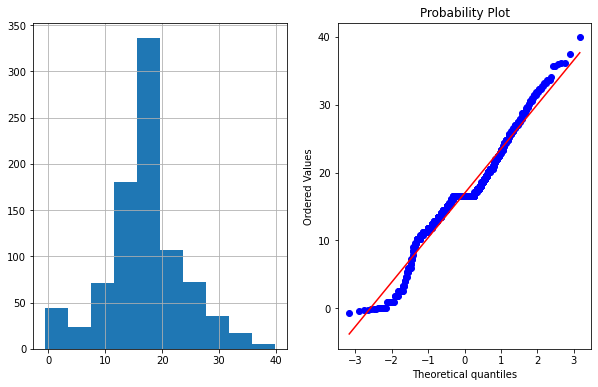

In [119]:
plot_data(df,'Age_Boxcox')

In [ ]:
##### This one(Boxcox) is the best so far, to convert the data into N.D.


#### So when transforming data into N.D , we first check whether the feature is already normally distributed or not. If not, we apply these transformation techniques to transform it into normal distribution so that our model works efficiently and accurately.

### In this case(Age) , the feature was already almost normally distributed we could have also carry on with that distribution or we can try these methods to transform the data perfectly into N.D.


In [120]:
## now we will, check the best fit method for "Fare" feature.

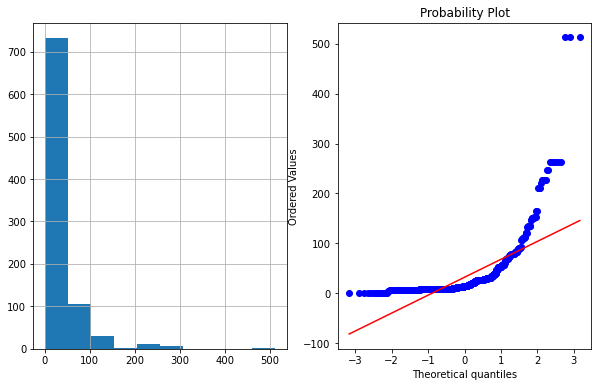

In [121]:
plot_data(df,'Fare')

In [122]:
## As we can see, the data is right skewed and from Q-Q plot we can see the data points are not following the best fit line therefore it is not normally distributed
## In order to transform these data into N.D , we will apply all the methods and then decide the best fit method

In [146]:
## Log transformation

In [124]:
df["Fare_log"]=np.log1p(df["Fare"])  # log1p() method returns log(1+number), computed in a way that is accurate even when the value of number is close to zero.(To avoid zeros)

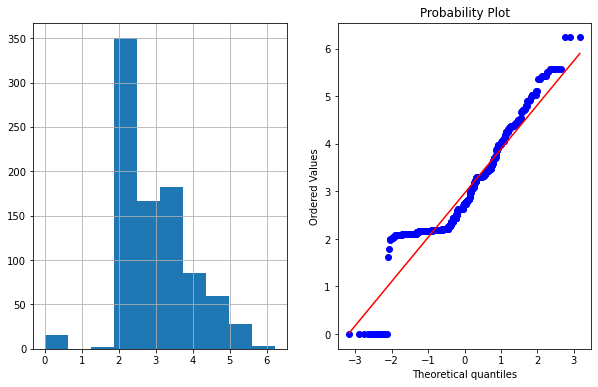

In [125]:
plot_data(df,"Fare_log")

In [126]:
## Now as we can see, the points almost follow the line which says that the data is decently transformed into N.D
## From hist plot , we can also observe the distribution(It has changed from right skewed to N.D)

In [ ]:
## Square Root Transformation

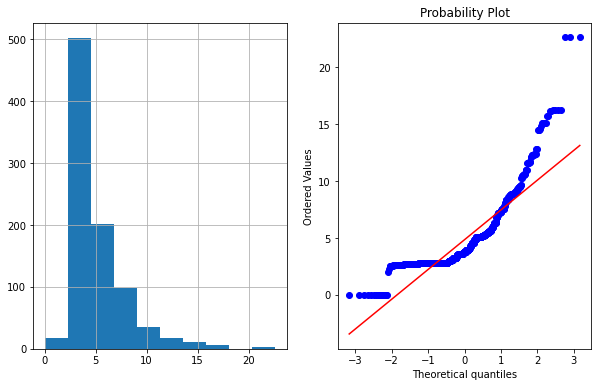

In [127]:
df["Fare_sqr"]=df["Fare"]**(1/2)
plot_data(df,"Fare_sqr")

In [128]:
## Better than initial but still not perfect!


In [ ]:
## Reciprocal

ValueError: supplied range of [1.0019518700085803, inf] is not finite

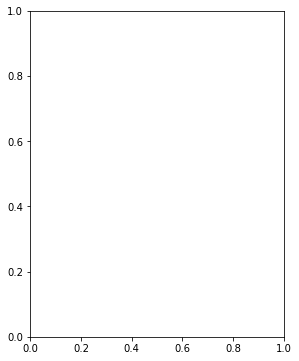

In [130]:
df["Fare_reciprocal"]=1/df["Fare"]
plot_data(df,"Fare_reciprocal")

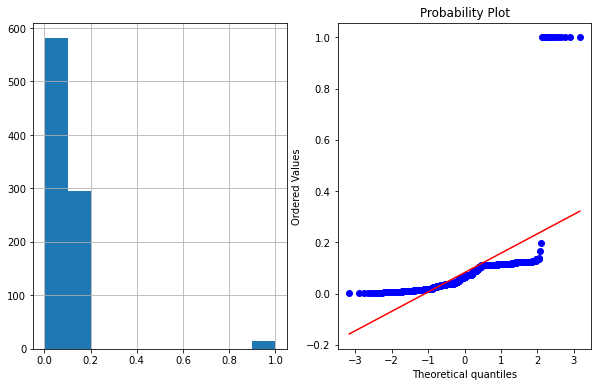

In [131]:
df["Fare_reciprocal"]=1/(df["Fare"]+1)   ## To avoid zero in denominator, i added 1 in it(not sure if it's good practice to do so)
plot_data(df,"Fare_reciprocal")

In [132]:
## The data became more right skewed and it's no way near the transformation to N.D.

In [134]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

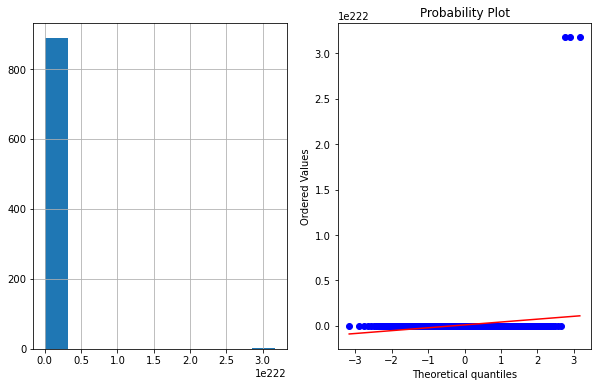

In [133]:
df["Fare_exp"]=np.exp(df["Fare"]) 
plot_data(df,"Fare_exp")

In [135]:
## Data is not perfectly normally distributed.

In [136]:
## Boxcox Transformation

In [139]:
df['Fare_Boxcox'],parameter=stat.boxcox(df["Fare"])

ValueError: Data must be positive.

In [140]:
df['Fare'].min()

0.0

In [141]:
df['Fare_Boxcox'],parameter=stat.boxcox(df["Fare"]+1) ## Everytime we get such type of error we add 1 

In [143]:
parameter

-0.09778702818680361

In [144]:
df['Fare_Boxcox']

0      1.906724
1      3.497640
2      1.970459
3      3.304258
4      1.981680
         ...   
886    2.326029
887    2.916885
888    2.745246
889    2.916885
890    1.954457
Name: Fare_Boxcox, Length: 891, dtype: float64

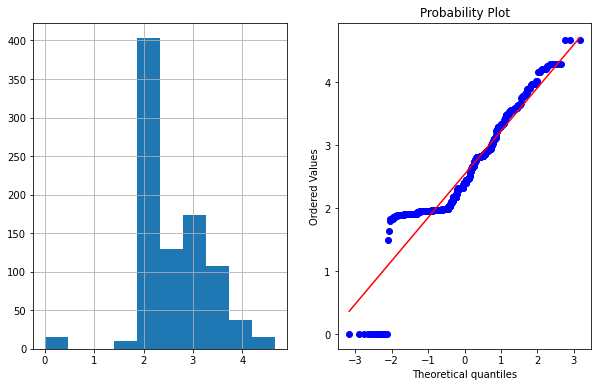

In [145]:
plot_data(df,"Fare_Boxcox")

In [ ]:
## Boxcox method also transforms the data into N.D quite perfectly.
## We can choose either of the log or boxcox as a best fit method of transformation for Fare feature

In [147]:
## When the data is right skewed , log transformation works really well - Krish